In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing the Libraries.
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
#import keras.backend as K
import tensorflow.keras.backend as K
import tensorflow.compat.v1 as tf
from os import listdir
from os.path import isfile, join
import numpy as np
import sys
import os
import shutil
import pandas as pd
from PIL import Image
import cv2
import keras
import glob
from PIL import Image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.models import load_model
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from PIL import ImageFile

tf.enable_eager_execution()

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Data Augmentation.
DataGenerator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255, brightness_range=[0.2,0.7])

In [ ]:
TestGenerator = ImageDataGenerator(rescale=1./255)

In [ ]:
Grey_TrainingData = DataGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Train/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 2788 images belonging to 68 classes.


In [ ]:
Grey_ValidData = TestGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Valid/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 136 images belonging to 68 classes.


In [ ]:
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
conv_base = InceptionV3(weights = 'imagenet', include_top = False, pooling = 'avg')

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in conv_base.layers[:299]:
  layer.trainable = False
for layer in conv_base.layers[299:]:
  layer.trainable = True
for layer in conv_base.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True

print("Done")

Done


In [ ]:
for i, layer in enumerate(conv_base.layers):
   print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization True
3 activation False
4 conv2d_1 False
5 batch_normalization_1 True
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 True
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 True
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 True
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 True
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 True
24 batch_normalization_9 True
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 True
33 batch_normalization_7 True
34 batch_normalization_10 True
35 batch_normalization_11 True
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 True
43 activatio

In [ ]:
from keras.layers import Input 

In [ ]:
input_tensor = Input(shape=(224,224,1))
x = Conv2D(3,(3,3), padding='same')(input_tensor)

In [ ]:
x = conv_base(x)

In [ ]:
x = Dense(2048, activation='relu', kernel_regularizer= regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)

In [ ]:
ouput = Dense(68, activation='softmax')(x)

In [ ]:
model = Model(inputs = input_tensor, outputs = ouput )

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 224, 224, 3)       30        
_________________________________________________________________
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 68)                139332    
Total params: 26,138,498
Trainable params: 4,746,146
Non-trainable params: 21,392,352
_______________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/RawFoot_Image/RawFoot_Image_GreyScale_Inspectionv3.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 40,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 40,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = model.fit_generator(steps_per_epoch=349,generator= Grey_TrainingData, validation_data= Grey_ValidData, validation_steps=17,epochs=150,callbacks=callBacks)

Epoch 1/150
349/349 [==============================] - 1132s 3s/step - loss: 4.5416 - accuracy: 0.1905 - val_loss: 3.6293 - val_accuracy: 0.2647

Epoch 00001: val_loss improved from inf to 3.62933, saving model to /content/drive/My Drive/RawFoot_Image/RawFoot_Image_GreyScale_Inspectionv3.h5
Epoch 2/150
349/349 [==============================] - 93s 267ms/step - loss: 2.4127 - accuracy: 0.4523 - val_loss: 8.6400 - val_accuracy: 0.4118

Epoch 00002: val_loss did not improve from 3.62933
Epoch 3/150
349/349 [==============================] - 94s 268ms/step - loss: 1.7486 - accuracy: 0.6155 - val_loss: 0.9556 - val_accuracy: 0.5956

Epoch 00003: val_loss improved from 3.62933 to 0.95557, saving model to /content/drive/My Drive/RawFoot_Image/RawFoot_Image_GreyScale_Inspectionv3.h5
Epoch 4/150
349/349 [==============================] - 95s 271ms/step - loss: 1.4378 - accuracy: 0.6801 - val_loss: 3.0775 - val_accuracy: 0.4779

Epoch 00004: val_loss did not improve from 0.95557
Epoch 5/150
349

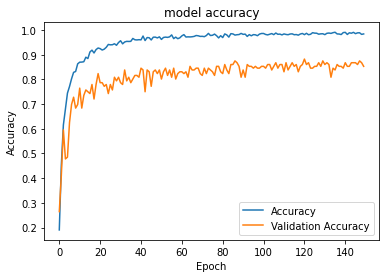

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

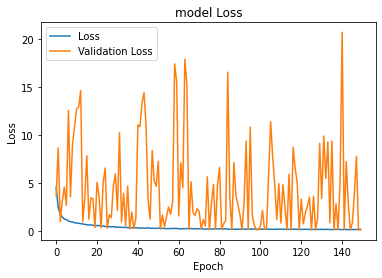

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
GreyTestData = TestGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Test/', target_size=(224,224), batch_size = 8, shuffle = False, color_mode='grayscale')

Found 204 images belonging to 68 classes.


In [ ]:
model.load_weights('/content/drive/My Drive/RawFoot_Image/RawFoot_Image_GreyScale_Inspectionv3.h5')

In [ ]:
Grey_predict = model.predict(GreyTestData)

In [ ]:
Grey_predict_classes = np.argmax(Grey_predict, axis=1)

In [ ]:
Grey_predict_classes

array([ 0,  0,  0,  1,  1,  1,  2, 51, 51,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 51,
       47, 47, 51, 36,  3, 13, 13, 36, 16, 14, 14, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 18, 18, 18, 60, 60, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 60, 60, 25, 25, 26, 26, 26, 27, 27, 27, 28,
       28, 35, 16, 29, 29, 51, 51, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
       34, 34, 60, 16, 35, 60, 36, 60, 36, 37, 60, 37, 38, 38, 38, 39, 39,
       39, 40, 40, 40, 60, 47, 41, 42, 42, 42, 43, 43, 43, 60, 44, 44, 45,
       45, 45, 46, 46, 46, 60, 60, 47, 60, 48, 48, 49, 49, 49, 50, 50, 50,
       51, 51, 51, 60, 35, 36, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56,
       56, 57, 57, 57, 58, 58, 58, 59, 59, 60, 60, 16, 51, 61, 61, 61, 62,
       62, 62, 60, 35, 60, 64, 64, 64, 52, 65, 35, 43, 66, 66, 67, 67, 67])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [ ]:
Grey_accuracy = accuracy_score(GreyTestData.classes, Grey_predict_classes)
print("Grey Accuracy: ", Grey_accuracy)

Grey Accuracy:  0.7990196078431373


In [ ]:
Grey_precision = precision_score(GreyTestData.classes, Grey_predict_classes,average="weighted")
print("Grey Precision: ", Grey_precision)

Grey Precision:  0.8696195144724557


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Grey_recall = recall_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("Grey Recall:", Grey_recall)

Grey Recall: 0.7990196078431373


In [ ]:
Grey_f1_score = f1_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("F1 score for Grey: ", Grey_f1_score)

F1 score for Grey:  0.8089231846584789


**Processing for colour Data.**

In [ ]:
Colour_TrainingData =  DataGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Train/', target_size=(224,224), batch_size=8)

Found 2788 images belonging to 68 classes.


In [ ]:
Colour_ValidData =  TestGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Valid/', target_size=(224,224), batch_size=8)

Found 136 images belonging to 68 classes.


In [ ]:
conv_base_colour = InceptionV3(weights = 'imagenet', include_top = False, pooling = 'avg')

In [ ]:
for layer in conv_base_colour.layers[:299]:
  layer.trainable = False
for layer in conv_base_colour.layers[299:]:
  layer.trainable = True
for layer in conv_base_colour.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True

print("Done")

Done


In [ ]:
for i, layer in enumerate(conv_base_colour.layers):
   print(i, layer.name, layer.trainable)

0 input_5 False
1 conv2d_189 False
2 batch_normalization_188 True
3 activation_188 False
4 conv2d_190 False
5 batch_normalization_189 True
6 activation_189 False
7 conv2d_191 False
8 batch_normalization_190 True
9 activation_190 False
10 max_pooling2d_8 False
11 conv2d_192 False
12 batch_normalization_191 True
13 activation_191 False
14 conv2d_193 False
15 batch_normalization_192 True
16 activation_192 False
17 max_pooling2d_9 False
18 conv2d_197 False
19 batch_normalization_196 True
20 activation_196 False
21 conv2d_195 False
22 conv2d_198 False
23 batch_normalization_194 True
24 batch_normalization_197 True
25 activation_194 False
26 activation_197 False
27 average_pooling2d_18 False
28 conv2d_194 False
29 conv2d_196 False
30 conv2d_199 False
31 conv2d_200 False
32 batch_normalization_193 True
33 batch_normalization_195 True
34 batch_normalization_198 True
35 batch_normalization_199 True
36 activation_193 False
37 activation_195 False
38 activation_198 False
39 activation_199 False
4

In [ ]:
from keras.layers import Input 

In [ ]:
input_tensor = Input(shape=(224,224,3))
x = conv_base_colour(input_tensor)

In [ ]:
x = Dense(2048, activation='relu', kernel_regularizer= regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)

In [ ]:
ouput = Dense(68, activation='softmax')(x)

In [ ]:
colour_model = Model(inputs = input_tensor, outputs = ouput )

In [ ]:
colour_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/RawFoot_Image/RawFoot_Image_Colour_Inspectionv3.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 40,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 40,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = colour_model.fit_generator(steps_per_epoch=349,generator= Colour_TrainingData, validation_data= Colour_ValidData, validation_steps=17,epochs=150,callbacks=callBacks)

Epoch 1/150
349/349 [==============================] - 103s 295ms/step - loss: 4.2380 - accuracy: 0.2611 - val_loss: 2.3198 - val_accuracy: 0.6985

Epoch 00001: val_loss improved from inf to 2.31982, saving model to /content/drive/My Drive/RawFoot_Image/RawFoot_Image_Colour_Inspectionv3.h5
Epoch 2/150
349/349 [==============================] - 87s 249ms/step - loss: 2.0455 - accuracy: 0.5843 - val_loss: 2.7929 - val_accuracy: 0.7574

Epoch 00002: val_loss did not improve from 2.31982
Epoch 3/150
349/349 [==============================] - 88s 252ms/step - loss: 1.4948 - accuracy: 0.7059 - val_loss: 1.1650 - val_accuracy: 0.7941

Epoch 00003: val_loss improved from 2.31982 to 1.16498, saving model to /content/drive/My Drive/RawFoot_Image/RawFoot_Image_Colour_Inspectionv3.h5
Epoch 4/150
349/349 [==============================] - 88s 253ms/step - loss: 1.3094 - accuracy: 0.7478 - val_loss: 1.8652 - val_accuracy: 0.7868

Epoch 00004: val_loss did not improve from 1.16498
Epoch 5/150
349/349

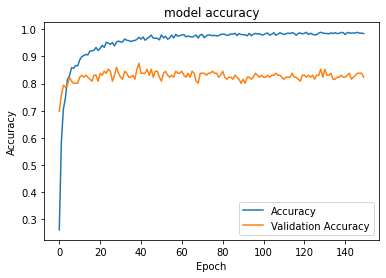

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

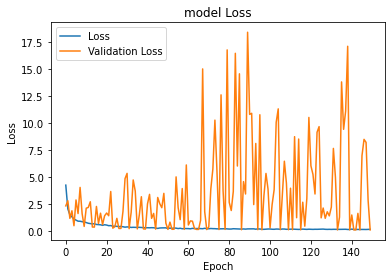

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
Colour_TestData = TestGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Test/', target_size=(224,224), batch_size = 8, shuffle = False)

Found 204 images belonging to 68 classes.


In [ ]:
colour_model.load_weights('/content/drive/My Drive/RawFoot_Image/RawFoot_Image_Colour_Inspectionv3.h5')

In [ ]:
Colour_predict = colour_model.predict(Colour_TestData)

In [ ]:
Colour_predict_classes = np.argmax(Colour_predict, axis=1)

In [ ]:
Colour_predict_classes

array([ 0,  0,  0,  1,  1, 52,  2, 28, 28,  3, 27,  3,  4,  4,  4, 64, 29,
        5,  6,  6,  6,  7,  7,  7,  8,  8, 15,  9,  9,  9, 10, 10, 10, 41,
       66, 29, 41, 12, 12, 13, 13, 61, 29, 14, 14, 15, 15, 15, 16, 16, 29,
       17, 17, 33, 39, 16, 18, 29, 16, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 16, 16, 26, 27, 27, 27, 28,
       28, 28, 64, 64, 29, 66, 66, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
       34, 34, 16, 29, 35, 66, 36, 16, 36, 37, 16, 37, 38, 38, 38, 39, 16,
       39, 40, 40, 40, 29, 29, 41, 42, 42, 42, 43, 43, 43, 29, 44, 44, 45,
       45, 45, 46, 46, 46, 47, 47, 47, 29, 48, 48, 49, 49, 49, 50, 50, 50,
       51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56,
       56, 57, 57,  3, 58, 58, 58, 59, 59, 59, 60, 66, 45, 61, 61, 61, 62,
       62, 62, 63, 63, 63, 64, 64, 64, 41, 65, 28, 66, 66, 66, 67, 67, 67])

In [ ]:
Colour_accuracy = accuracy_score(Colour_TestData.classes, Colour_predict_classes)
print("Colour Accuracy: ", Colour_accuracy)

Colour Accuracy:  0.803921568627451


In [ ]:
Colour_precision = precision_score(Colour_TestData.classes, Colour_predict_classes,average="weighted")
print("Colour Precision: ", Colour_precision)

Colour Precision:  0.8933712121212122


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Colour_recall = recall_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("Colour Recall:", Colour_recall)

Colour Recall: 0.803921568627451


In [ ]:
Colour_f1_score = f1_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("F1 score for colour: ", Colour_f1_score)

F1 score for colour:  0.8116359131065013


**Emsemble**

In [ ]:
Final = 0.6* Colour_predict + 0.4* Grey_predict

In [ ]:
Final_Predict_classes = np.argmax(Final, axis=1)

In [ ]:
Final_Predict_classes

array([ 0,  0,  0,  1,  1, 52,  2, 51, 51,  3,  3,  3,  4,  4,  4, 64, 29,
        5,  6,  6,  6,  7,  7,  7,  8,  8, 15,  9,  9,  9, 10, 10, 10, 41,
       66, 29, 41, 12, 12, 13, 13, 61, 29, 14, 14, 15, 15, 15, 16, 16, 29,
       17, 17, 33, 18, 16, 18, 29, 16, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 16, 16, 26, 27, 27, 27, 28,
       28, 28, 64, 64, 29, 66, 66, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
       34, 34, 16, 16, 35, 66, 36, 16, 36, 37, 16, 37, 38, 38, 38, 39, 16,
       39, 40, 40, 40, 29, 29, 41, 42, 42, 42, 43, 43, 43, 60, 44, 44, 45,
       45, 45, 46, 46, 46, 47, 47, 47, 29, 48, 48, 49, 49, 49, 50, 50, 50,
       51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56,
       56, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 66, 51, 61, 61, 61, 62,
       62, 62, 63, 63, 63, 64, 64, 64, 41, 65, 28, 66, 66, 66, 67, 67, 67])

In [ ]:
Final_accuracy = accuracy_score(Colour_TestData.classes, Final_Predict_classes)
print("Colour Accuracy: ", Final_accuracy)

Colour Accuracy:  0.8186274509803921


In [ ]:
Final_precision = precision_score(Colour_TestData.classes, Final_Predict_classes,average="weighted")
print("Colour Precision: ", Final_precision)

Colour Precision:  0.8995283719548425


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Final_recall = recall_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("Colour Recall:", Final_recall)

Colour Recall: 0.8186274509803921


In [ ]:
Final_f1_score = f1_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("F1 score for colour: ", Final_f1_score)

F1 score for colour:  0.8265087853323146


In [ ]:
Second_Final = 0.5* Colour_predict + 0.5 * Grey_predict

In [ ]:
Second_predict_classes = np.argmax(Second_Final, axis=1)

In [ ]:
Second_predict_classes

array([ 0,  0,  0,  1,  1,  1,  2, 51, 51,  3,  3,  3,  4,  4,  4, 64, 29,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 41,
       66, 29, 51, 12, 12, 13, 13, 61, 29, 14, 14, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 18, 18, 18, 29, 60, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28,
       28, 28, 64, 64, 29, 66, 66, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
       34, 34, 60, 16, 35, 60, 36, 16, 36, 37, 16, 37, 38, 38, 38, 39, 16,
       39, 40, 40, 40, 29, 29, 41, 42, 42, 42, 43, 43, 43, 60, 44, 44, 45,
       45, 45, 46, 46, 46, 47, 47, 47, 60, 48, 48, 49, 49, 49, 50, 50, 50,
       51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56,
       56, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 66, 51, 61, 61, 61, 62,
       62, 62, 60, 35, 60, 64, 64, 64, 41, 65, 35, 66, 66, 66, 67, 67, 67])

In [ ]:
Second_Final_accuracy = accuracy_score(Colour_TestData.classes, Second_predict_classes)
Second_Final_accuracy

0.8382352941176471

In [ ]:
Final = 0.8* Colour_predict + 0.2* Grey_predict

In [ ]:
Final_Predict_classes = np.argmax(Final, axis=1)

In [ ]:
Final_accuracy = accuracy_score(Colour_TestData.classes, Final_Predict_classes)
print("Colour Accuracy: ", Final_accuracy)

Colour Accuracy:  0.7941176470588235
